# $2^{nd}$ exercises

## Notebook setup

#### Used libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

#### Reading and printing config files

In [2]:
def LoadConfig(path):
    d={}
    with open(path) as file:
        for line in file:
            (directive,key, val) = line.split()
            if(directive=="#define"): d[key] = int(val)
    return d

def PrintConf(d):
    for key, val in d.items(): print("{0:<19}{1}".format(key,val))

#### Colors, just for fun

In [3]:
stb = "#191724" #background
ndb = "#26233a" #object background
ste = "#e0def4" #main elements
nde = "#f6c177" #additional elements
rde = "#eb6f92" #element in evidence
err = "#908caa" #error bar
er2 = "#6e6a86" #second error bar

## 02.1 - Integrals

## Introductory notes
Montecarlo methods can be used to evaluate integrals. A possible method is the uniform sampling. The idea is to rewrite the target integral in the following way
\begin{equation}
    I=\int_{\Omega}f(x) dx=\int_{\Omega}g(x)p(x) dx\quad\text{where}\quad p(x)>0\,\,\forall x\in\Omega,\,\,\int_\Omega p(x) dx=1
\end{equation}
That is $I=\langle g \rangle$ with the measure $p(x)dx$. Now if one takes into account the quantity $G_N=\sum_i g(x_i)/N$, with $x_i$ distributed according to $p$, thanks to central limit theorem we have $\langle G_N \rangle = \langle g \rangle = I$. The easyest choiche is to take $p(x)=1/\mu(\Omega)$ and $g(x)=\mu(\Omega)/f(x)$ ($\mu(\Omega)$ the measure of the set), that is the uniform sampling.

One could argue that this is not the best choiche for $p$: this leads to what is called importance sampling. The idea is to rewrite again the target integral as
\begin{equation}
    I=\int_{\Omega}\biggl[\frac{g(x)p(x)}{d(x)}\biggr]d(x) dx\quad\text{where}\quad d(x)>0\,\,\forall x\in\Omega,\,\,\int_\Omega d(x) dx=1
\end{equation}
and to minimize
\begin{equation}
    \sigma^2_I(d)=\int_{\Omega}\biggl[\frac{g(x)p(x)}{d(x)}\biggr]^2d(x)-I^2 dx
\end{equation}
Using lagrange multipliers to keep track of the normalization constraint on $d$ and the functional derivative one get that the minimizing pdf is $d^*=|pg|/\int_{\Omega}|g(x)p(x)|dx$, that is $d^*=pg/I=f/I$ if $g(x)>0$. Clearly $\sigma_I(d^*)=0$ (but a knowledge of $d*$ requires the knowledge of I) and we can expect that choosing $d$ similar to $d^*$, that is similar to $f$, we get $\sigma_i<<1$.

We can apply those methods to
\begin{equation}
    I = \int_0^1 \frac{\pi}{2}\cos\Bigl(\frac{\pi}{2} x \Bigr) dx = 1
\end{equation}
Since $\Omega=[0,1]$ uniform sampling is immediate. A possible choice for importance sampling could be a Taylor expansion of the integrand in 0, proportional to $1-\pi^2/8 x^2$ which changes sign in the domain of integration. A better choiche is the taylor expansion in 1 $2(1-x)$ that is always positive in the domain of integration and that can be sampled using the inverse of the cumulative method using the formula $1-\sqrt{1-y}$.

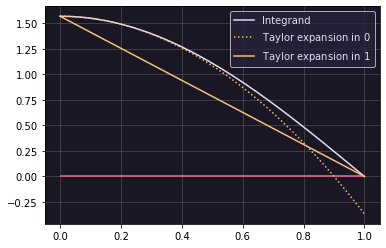

In [4]:
x  = np.linspace(0, 1, 1000)
f  = np.pi/2 * np.cos(np.pi/2 * x)
f0 = np.pi/2 * (1 - np.pi**2/8 * x**2)
f1 = np.pi/2 * (1 - x)

plt.axes().set_facecolor(stb)
plt.hlines(0, 0, 1, color=rde)
plt.plot(x, f, color=ste, label="Integrand")
plt.plot(x, f0, ":", color=nde,  label="Taylor expansion in $0$")
plt.plot(x, f1,color=nde, label="Taylor expansion in $1$")
leg = plt.legend(facecolor=ndb)
for text in leg.get_texts():
    text.set_color(ste)
plt.grid(alpha=0.3)
plt.show()



 Higher order expansions suffers from the fact that point have to be sampled using an accept-reject method.


### Brief recap
**Goal:** Evaluate $\int_0^1 \frac{\pi}{2} cos(\frac{\pi}{2}x) dx$ using uniform and importance sampling.

**Expectations:** We expect the results to be compatible with $1$.
 
**Methodological notes:** We use the datablocking method to evaluate progressive averages and statistical uncertainties.

###  Results
We divided the estimation in `N_BLOCKS` blocks with `STEPS_PER_BLOCK` steps each - 
with:

In [5]:
conf=LoadConfig("in/021-conf.inl")
PrintConf(conf)

N_BLOCKS           100
STEPS_PER_BLOCK    1000


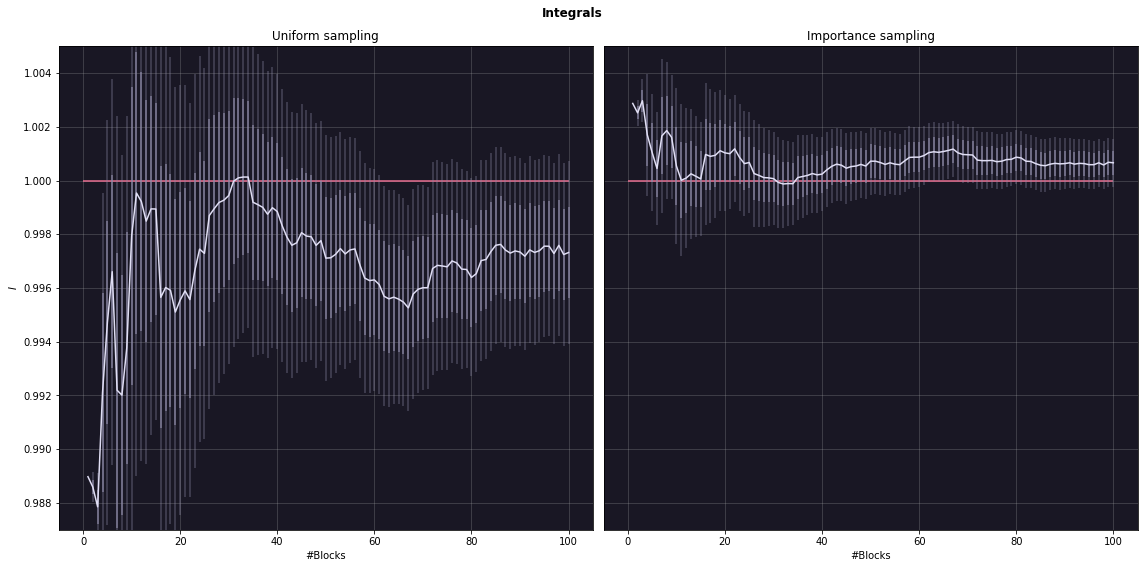

Uniform sampling (last block): 0.9973 ± 0.0017
Importance sampling (last block): 1.0007 ± 0.0005


In [6]:
y_inf=0.987
y_sup=1.005

fig=plt.figure(figsize=(16, 8))
plt.suptitle('Integrals', weight='bold')

#uniform 
data = np.genfromtxt("out/021-uniform.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,3]
e=data[:,4]

ye_unif=[y[-1],e[-1]]

plt.subplot(121)
fig.axes[0].set_facecolor(stb)

plt.ylim(y_inf,y_sup)
plt.hlines(1, 0, conf["N_BLOCKS"],color=rde)
#posso mettere insieme a errorbar? ha senso cambiare tipo di grafico?
plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.vlines(x,y-2*e,y+2*e,color=err,alpha=0.4)
plt.errorbar(x,y,color=ste)

plt.xlabel('#Blocks')
plt.ylabel('$I$')
plt.title("Uniform sampling")
plt.grid(alpha=0.3)

#importance 
data = np.genfromtxt("out/021-importance_o1.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,3]
e=data[:,4]
ye_impo=[y[-1],e[-1]]

plt.subplot(122)
fig.axes[1].set_facecolor(stb)

plt.ylim(y_inf,y_sup)
plt.hlines(1, 0, conf["N_BLOCKS"],color=rde)
#posso mettere insieme a errorbar? ha senso cambiare tipo di grafico?
plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.vlines(x,y-2*e,y+2*e,color=err,alpha=0.4)
plt.errorbar(x,y,color=ste)

plt.tick_params(left=False,labelleft=False)
plt.xlabel('#Blocks')
plt.title("Importance sampling")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

dp=4
y_impo=round(ye_impo[0],dp)
e_impo=round(ye_impo[1],dp)
y_unif=round(ye_unif[0],dp)
e_unif=round(ye_unif[1],dp)
print(f"Uniform sampling (last block): {y_unif} ± {e_unif}")
print(f"Importance sampling (last block): {y_impo} ± {e_impo}")

As expected, both method are compatible with the exact value of the intregral and, as we can see, the standard deviation using importance sampling is more than 10 times smaller than the standard deviation using uniform sampling.

## 02.2 - Random walk

### Introductory notes
Da capire bene

Sampling the discrete random walk is easy: it's sufficent to generate uniformly two random number, one to chose the direction and the other to chose the verse of the move. For the continuous random walk we also need two numbers, representing the two relevant 3D angles, but we need to be careful: while the polar angle $\varphi$ is sampled uniformly in $[0,2\pi)$, for the azimuthal angle $\theta$ we need to keep in mind that its measure is $\sin\theta d\theta$ so, evaluating the normalization, we have that the pdf of $\theta$ is $p(\theta)=\frac{1}{2}\sin\theta\chi_{[0,\pi]}(\theta)$ with $\chi_I$ the charateristic function of the interval $I$. Using the inverse of the cumulative method we get $\theta=\cos^{-1}(1-2y)$ where $y$ is uniformly sampled in $[0,1)$

**Goal:** Evaluate $\sqrt{\langle |\vec{r}|^2 \rangle}$ (where $r$ is the distance from the origin) in function of the steps of isotropic random walks with steps of fixed lenght on a cubic lattice and in the continuum.

**Expectations:** We expect to observe a diffusive behaviour.

**Methodological notes:** To evaluate the averages we let $N$, divided into $B$ blocks, random walks evolve. At each step, we used data blocking.

### Results
We divided the estimation in `N_BLOCKS` blocks with `RW_PER_BLOCK` random walks per block. The simulation lasted for `RW_STEPS` steps. The steps lenght was fixed to `LATTICE_DIM` - where:

In [7]:
conf=LoadConfig("in/022-conf.inl")
PrintConf(conf)

N_BLOCKS           100
RW_PER_BLOCK       1000
RW_STEPS           100
LATTICE_DIM        1


#### Discrete

<Figure size 1080x936 with 0 Axes>

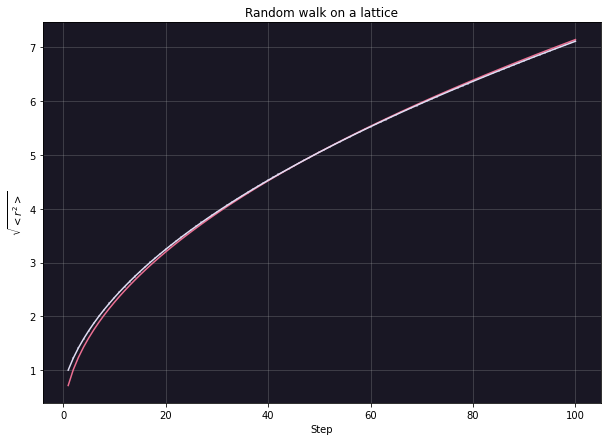

Fit: (0.7144 ± 0.0008) * √x


In [10]:
fig=plt.figure(figsize=(15, 13))
data = np.genfromtxt("out/022-discreterw.csv", delimiter=",", skip_header=1)
x=data[:,0];
y=data[:,1];
e=data[:,2];

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(stb)

plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.errorbar(x,y,color=ste)

f = lambda x, k: k * np.sqrt(x)
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color=rde, label='Fit')

plt.xlabel('Step')
plt.ylabel('$\\sqrt{<r^2>}$')
plt.title("Random walk on a lattice")
plt.grid(alpha=0.3)
plt.show()

dp=4
k=round(popt[0],dp)
sigma=round(np.sqrt(pcov[0,0]),dp)
print(f"Fit: ({k} ± {sigma}) * √x")

#### Continuous

<Figure size 1080x936 with 0 Axes>

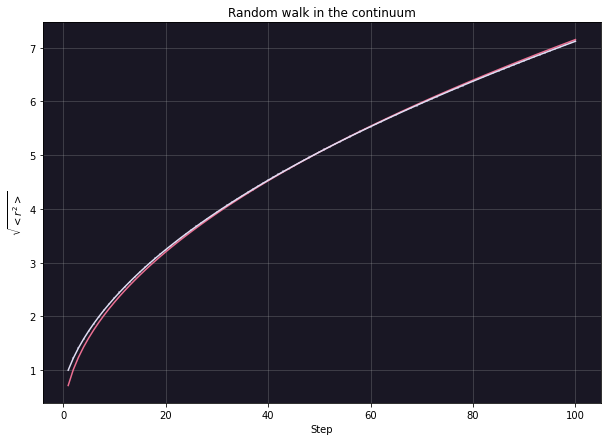

Fit: (0.715 ± 0.001) * √x


In [11]:
fig=plt.figure(figsize=(15, 13))
data = np.genfromtxt("out/022-continuousrw.csv", delimiter=",", skip_header=1)
x=data[:,0];
y=data[:,1];
e=data[:,2];

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(stb)

plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.errorbar(x,y,color=ste)

f = lambda x, k: k * np.sqrt(x)
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color=rde, label='Fit')

plt.xlabel('Step')
plt.ylabel('$\\sqrt{<r^2>}$')
plt.title("Random walk in the continuum")
plt.grid(alpha=0.3)
plt.show()

dp=3
k=round(popt[0],dp)
sigma=round(np.sqrt(pcov[0,0]),dp)

print(f"Fit: ({k} ± {sigma}) * √x")